In [12]:
%matplotlib notebook
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

dataset= load_digits()
X,y= dataset.data,dataset.target

In [15]:
# Creating imbalanced 
y_binary_imbalanced = y.copy()
y_binary_imbalanced[y!=1]=0
np.bincount(y_binary_imbalanced)

array([1615,  182], dtype=int64)

In [19]:
from sklearn.svm import SVC
X_train,X_test,y_train,y_test = train_test_split(X,y_binary_imbalanced,random_state=0)
clf = SVC(kernel='rbf',C=1).fit(X_train,y_train)
print('Train accuracy {}'.format(clf.score(X_train,y_train)))
print('Test accuracy {}'.format(clf.score(X_test,y_test)))
      

Train accuracy 1.0
Test accuracy 0.9088888888888889


# Dummy Classifier

In [22]:
from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier(strategy='most_frequent').fit(X_train,y_train)
print('Train accuracy {}'.format(dummy_clf.score(X_train,y_train)))
print('Test accuracy {}'.format(dummy_clf.score(X_test,y_test)))
dummy_clf.predict(X_test)

Train accuracy 0.896807720861173
Test accuracy 0.9044444444444445


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0,

In [23]:
clf = SVC(kernel='linear',C=1).fit(X_train,y_train)
print('Train accuracy {}'.format(clf.score(X_train,y_train)))
print('Test accuracy {}'.format(clf.score(X_test,y_test)))

Train accuracy 1.0
Test accuracy 0.9777777777777777


# Confusion Matrix

In [29]:
from sklearn.metrics import confusion_matrix
dummy_clf = DummyClassifier(strategy='most_frequent').fit(X_train,y_train)
y_predicted  = dummy_clf.predict(X_test)
confusion= confusion_matrix(y_test,y_predicted)
print(confusion)

[[407   0]
 [ 43   0]]


In [30]:
from sklearn.metrics import confusion_matrix
dummy_clf = DummyClassifier(strategy='stratified').fit(X_train,y_train)
y_predicted  = dummy_clf.predict(X_test)
confusion= confusion_matrix(y_test,y_predicted)
print(confusion)

[[369  38]
 [ 40   3]]


In [32]:
svm = SVC(kernel='linear').fit(X_train,y_train)
y_predicted  = svm.predict(X_test)
confusion= confusion_matrix(y_test,y_predicted)
print(confusion)

[[402   5]
 [  5  38]]


In [33]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression().fit(X_train,y_train)
y_predicted  = clf.predict(X_test)
confusion= confusion_matrix(y_test,y_predicted)
print(confusion)

[[401   6]
 [  6  37]]


In [35]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=2).fit(X_train,y_train)
y_predicted  = dt.predict(X_test)
confusion= confusion_matrix(y_test,y_predicted)
print(confusion)

[[400   7]
 [ 17  26]]


# Evaluation metric for binary classifier

In [44]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

print('Accuracy : {}'.format(accuracy_score(y_test,y_predicted)))
print('Precision : {}'.format(precision_score(y_test,y_predicted)))
print('Recall : {}'.format(recall_score(y_test,y_predicted)))
print('f1_score : {}'.format(f1_score(y_test,y_predicted)))

Accuracy : 0.9466666666666667
Precision : 0.7878787878787878
Recall : 0.6046511627906976
f1_score : 0.6842105263157895


In [46]:
# combined report 
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predicted))

             precision    recall  f1-score   support

          0       0.96      0.98      0.97       407
          1       0.79      0.60      0.68        43

avg / total       0.94      0.95      0.94       450



# Decision functions

In [74]:
X_train,X_test,y_train,y_test = train_test_split(X,y_binary_imbalanced,random_state=0)
y_scores_lr = LogisticRegression().fit(X_train,y_train).decision_function(X_test)
y_score_list = list(zip(y_test[0:20], y_scores_lr[0:20]))
y_score_list[:20]

[(0, -23.176547400757663),
 (0, -13.541223742469006),
 (0, -21.722500473360618),
 (0, -18.907578437722535),
 (0, -19.736034587372778),
 (0, -9.7493459511792651),
 (1, 5.2349002124953099),
 (0, -19.30716117885968),
 (0, -25.101015601857377),
 (0, -21.827250934235906),
 (0, -24.150855663826746),
 (0, -19.576844844946265),
 (0, -22.574902551102674),
 (0, -10.823739601445064),
 (0, -11.912425566043064),
 (0, -10.97956652705531),
 (1, 11.205846086251944),
 (0, -27.645770221552823),
 (0, -12.859636015637092),
 (0, -25.848590145556187)]

In [72]:
X_train,X_test,y_train,y_test = train_test_split(X,y_binary_imbalanced,random_state=0)
y_scores_lr = LogisticRegression().fit(X_train,y_train).predict_proba(X_test)
y_score_list =list(zip(y_test,y_scores_lr[:,1]))
y_score_list[:20]

[(0, 8.6010872706740499e-11),
 (0, 1.3155903495453823e-06),
 (0, 3.6816111034009875e-10),
 (0, 6.1452989618944584e-09),
 (0, 2.6837934145133791e-09),
 (0, 5.8329401240781557e-05),
 (1, 0.99470087426871634),
 (0, 4.1210362715903745e-09),
 (0, 1.2553575357627774e-11),
 (0, 3.3154719959007555e-10),
 (0, 3.2465093048358345e-11),
 (0, 3.1469099051059103e-09),
 (0, 1.5698002448420801e-10),
 (0, 1.9920533537070619e-05),
 (0, 6.706507243234968e-06),
 (0, 1.7046194538057202e-05),
 (1, 0.99998640569605668),
 (0, 9.8535912965519826e-13),
 (0, 2.6009374594983658e-06),
 (0, 5.9442892596185542e-12)]

# Precision - recall curves


<IPython.core.display.Javascript object>


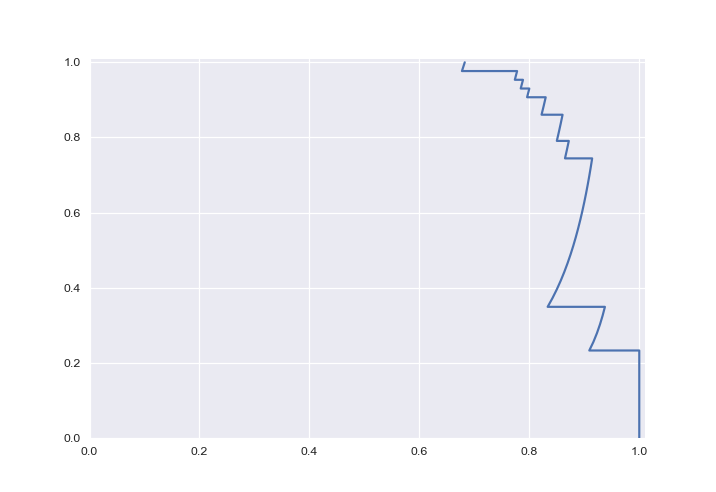

In [80]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, y_scores_lr)
closest_zero = np.argmin(np.abs(thresholds))
closest_zero_p = precision[closest_zero]
closest_zero_r = recall[closest_zero]

plt.figure()
plt.xlim([0.0, 1.01])
plt.ylim([0.0, 1.01])
plt.plot(precision, recall, label='Precision-Recall Curve')

# ROC curve 

<IPython.core.display.Javascript object>


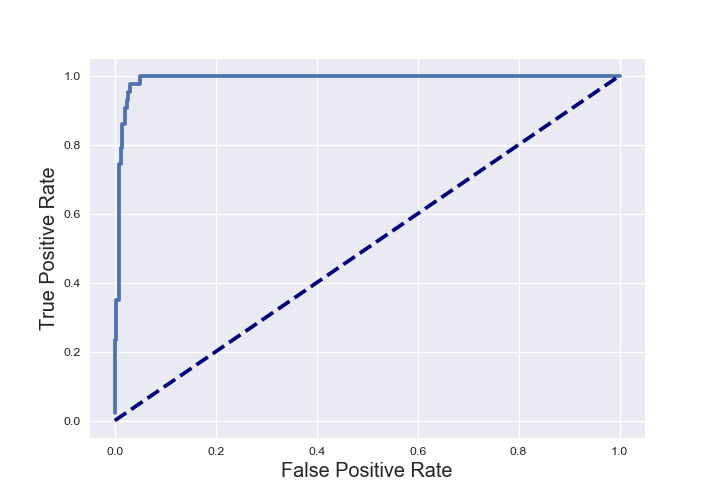

In [85]:
from sklearn.metrics import roc_curve,auc
X_train,X_test ,y_train,y_test = train_test_split(X,y_binary_imbalanced,random_state=0)

y_score_lr = LogisticRegression().fit(X_train,y_train).decision_function(X_test)
fpr_lr,tpr_lr,_ = roc_curve(y_test,y_score_lr)
roc_auc_lr = auc(fpr_lr,tpr_lr)
plt.figure()
plt.plot(fpr_lr,tpr_lr,lw=3)
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')

In [87]:
X_train,X_test,y_train,y_test = train_test_split(X,y_binary_imbalanced,random_state=0)

plt.figure()
for g in [0.01, 0.1, 0.2,1]:
    svm = SVC(gamma=g).fit(X_train,y_train)
    y_score_svm =svm.decision_function(X_test)
    fpr_svm,tpr_svm = roc_curve(y_test,y_score_svm)
    roc_auc_svm = auc(fpr_svm,tpr_svm)
    accuracy_svm= svm.score(X_test,y_test)
    plt.plot(fpr_svm,tpr_svm,lw=3,alpha=0.7)

<IPython.core.display.Javascript object>

ValueError: too many values to unpack (expected 2)